#1.Setting up data

1.1 Installing and configuring dependencies

In [ ]:
!pip3 install labelme opencv-python matplotlib albumentations

1.2 Collect Images

In [3]:
import os
import time
import uuid
import cv2

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
IMAGES_PATH='/content/drive/MyDrive/Colab Notebooks/face/images'
number_images=len(os.listdir(IMAGES_PATH))


Script to be run on local machine to capture images via camera device


In [ ]:

import cv2
import time
import uuid
import os
IMAGES_PATH='<directory_name>'
cap=cv2.VideoCapture(0)
for imgnum in range(30):
  print('Collecting image {}'.format(imgnum))
  ret,frame=cap.read()
  if (not cap.isOpened()):
    print("ERROR! Unable to open camera")


  imgname=os.path.join(IMAGES_PATH,f'{str(uuid.uuid1())}.jpg')
  cv2.imwrite(imgname,frame)
  cv2.imshow('frame',frame)
  time.sleep(0.5)

  if cv2.waitKey(1) & 0xFF == ord('q'):
    break
cap.release()
cv2.destroyAllWindows()


1.3 Annotate images with LabelMe

In [6]:
'''
#commands to run in the command line
brew install pyqt5
brew install wkentaro/labelme/labelme
labelme
#label images and store output in label folder within face
'''

'\n#commands to run in the command line\nbrew install pyqt5\nbrew install wkentaro/labelme/labelme\nlabelme\n#label images and store output in label folder within face\n'

# 2.Reviewing dataset and setting up image loading function


In [6]:
import tensorflow as tf
import json
import matplotlib.pyplot as plt
import numpy as np
import os

2.1 Limiting memory growth

In [7]:
gpus = tf.config.experimental.list_physical_devices('GPU')
for gpu in gpus:
  tf.config.experimental.set_memory_growth(gpu, True)

In [ ]:
gpus

2.2 Load image into TF Data Pipeline

In [10]:
images=tf.data.Dataset.list_files('/content/drive/MyDrive/Colab Notebooks/face/images/*jpg',shuffle=False)
images.as_numpy_iterator().next()


b'/content/drive/MyDrive/Colab Notebooks/face/images/31674610-3276-11ee-aa8c-2e013a75cc45.jpg'

In [11]:
def load_image(x):
  byte_img=tf.io.read_file(x)
  img=tf.io.decode_jpeg(byte_img)
  return img

In [12]:
images=images.map(load_image)#pass all entries of the dataset through the map function
images.as_numpy_iterator().next()

array([[[200, 197, 182],
        [200, 197, 182],
        [206, 203, 188],
        ...,
        [190, 187, 178],
        [189, 186, 177],
        [190, 187, 178]],

       [[203, 200, 185],
        [204, 201, 186],
        [208, 205, 190],
        ...,
        [186, 183, 174],
        [183, 180, 171],
        [186, 183, 174]],

       [[204, 201, 186],
        [205, 202, 187],
        [207, 204, 189],
        ...,
        [184, 184, 174],
        [180, 180, 170],
        [180, 180, 170]],

       ...,

       [[183, 184, 170],
        [183, 184, 170],
        [187, 188, 174],
        ...,
        [140, 140, 130],
        [138, 140, 129],
        [138, 140, 129]],

       [[186, 187, 173],
        [184, 185, 171],
        [187, 188, 174],
        ...,
        [138, 140, 129],
        [138, 140, 129],
        [136, 138, 127]],

       [[185, 186, 172],
        [183, 184, 170],
        [184, 185, 171],
        ...,
        [136, 138, 127],
        [138, 140, 129],
        [137, 139, 128]]

In [13]:
type(images)

tensorflow.python.data.ops.map_op._MapDataset

In [14]:
image_generator=images.batch(4).as_numpy_iterator()

In [15]:
plot_images=image_generator.next()

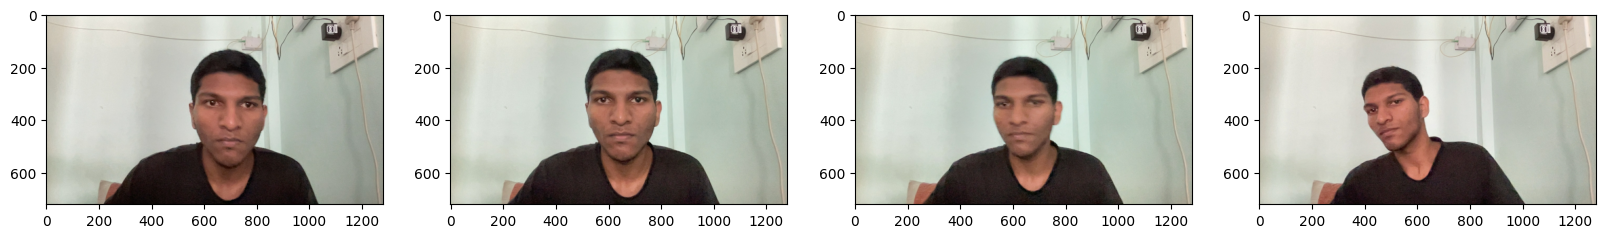

In [16]:
fig, ax = plt.subplots(ncols=4, figsize = (20,20))
for idx, image in enumerate(plot_images):
  ax[idx].imshow(image)
plt.show()

#3. Partition Unaugmented Data

In [17]:
len(os.listdir('/content/drive/MyDrive/Colab Notebooks/face/images'))

65

In [18]:
all_files=os.listdir('/content/drive/MyDrive/Colab Notebooks/face/images')
all_files

['WhatsApp Image 2023-04-28 at 9.55.46 PM.jpeg',
 'studio-portrait-of-20-year-old-woman.webp',
 'photo-1594819047050-99defca82545.jpg',
 'photo-1602033350291-a9ab8d800269.jpg',
 'freckled-woman-face-portrait-natural-beauty-concept_53876-160147.webp',
 'photo-1542909168-82c3e7fdca5c.jpg',
 'beauty-portrait-of-young-woman.webp',
 'front-portrait-beautiful-woman-s-face-with-closed-eye-isolated_186202-7217.webp',
 'handsome-young-adult-businessman-with-stubble.webp',
 'premium_photo-1664203068007-52240d0ca48f.jpg',
 'photo-1521146764736-56c929d59c83.jpg',
 'beautiful-brunette-woman-portrait-smiling-face_53876-137688.webp',
 '0c1dbf27c5a5b7411dfe1cef4114e8f8.webp',
 'photo-1557296387-5358ad7997bb.jpg',
 'woman-with-a-face-mask.webp',
 'serene-beauty.webp',
 'professional-man-portrait.webp',
 'young-beautiful-woman.webp',
 'depositphotos_342950242-stock-photo-asian-women-with-wrinkles-on.webp',
 'smiling-young-woman-with-curly-hear-and-clear-skin.webp',
 'photo-1509967419530-da38b4704bc6.jpg

In [19]:
all_labels=os.listdir('/content/drive/MyDrive/Colab Notebooks/face/labels')
parent_dir = '/content/drive/MyDrive/Colab Notebooks/face'
all_labels

['0c1dbf27c5a5b7411dfe1cef4114e8f8.json',
 '31674610-3276-11ee-aa8c-2e013a75cc45.json',
 '31bd87f0-3276-11ee-aa8c-2e013a75cc45.json',
 '321400d0-3276-11ee-aa8c-2e013a75cc45.json',
 '326a7dde-3276-11ee-aa8c-2e013a75cc45.json',
 '32c106e0-3276-11ee-aa8c-2e013a75cc45.json',
 '33177ef8-3276-11ee-aa8c-2e013a75cc45.json',
 '336de0f4-3276-11ee-aa8c-2e013a75cc45.json',
 '33c43fb2-3276-11ee-aa8c-2e013a75cc45.json',
 '341ad174-3276-11ee-aa8c-2e013a75cc45.json',
 '34712830-3276-11ee-aa8c-2e013a75cc45.json',
 '34c79c60-3276-11ee-aa8c-2e013a75cc45.json',
 '351e0460-3276-11ee-aa8c-2e013a75cc45.json',
 '35746a76-3276-11ee-aa8c-2e013a75cc45.json',
 '35caebf8-3276-11ee-aa8c-2e013a75cc45.json',
 '36215c04-3276-11ee-aa8c-2e013a75cc45.json',
 '3677b9dc-3276-11ee-aa8c-2e013a75cc45.json',
 '36ce3528-3276-11ee-aa8c-2e013a75cc45.json',
 '372487de-3276-11ee-aa8c-2e013a75cc45.json',
 '377b087a-3276-11ee-aa8c-2e013a75cc45.json',
 '37d1778c-3276-11ee-aa8c-2e013a75cc45.json',
 '3827e2de-3276-11ee-aa8c-2e013a75cc45

3.1 splitting data into train, test and validation sets

In [20]:

import random
import shutil

parent_dir = '/content/drive/MyDrive/Colab Notebooks/face'

# Create the 'train', 'val', and 'test' folders within the parent directory
train_dir = os.path.join(parent_dir, 'train')
val_dir = os.path.join(parent_dir, 'val')
test_dir = os.path.join(parent_dir, 'test')
os.makedirs(train_dir, exist_ok=True)
os.makedirs(val_dir, exist_ok=True)
os.makedirs(test_dir, exist_ok=True)

# List all image files in the 'images' folder
images_folder = os.path.join(parent_dir, 'images')
image_files = [f for f in os.listdir(images_folder) if os.path.isfile(os.path.join(images_folder, f))]

# Shuffle the list of image files randomly (optional)
random.shuffle(image_files)

# Split ratio for train, val, and test datasets
train_ratio = 0.7
val_ratio = 0.2
test_ratio = 0.1

# Calculate the number of files for each split
total_files = len(image_files)
train_count = int(train_ratio * total_files)
val_count = int(val_ratio * total_files)
test_count = total_files - train_count - val_count

# Split the image and label files into corresponding train, val, and test folders
for i, file in enumerate(image_files):
    src_image_path = os.path.join(images_folder, file)
    src_label_path = os.path.join(parent_dir, 'labels', os.path.splitext(file)[0] + '.json')

    if i < train_count:
        dest_folder = os.path.join(train_dir, 'images')
    elif i < train_count + val_count:
        dest_folder = os.path.join(val_dir, 'images')
    else:
        dest_folder = os.path.join(test_dir, 'images')

    # Copy the image files to the corresponding split folder
    shutil.copy(src_image_path, dest_folder)

    # Create 'labels' subfolders within the corresponding split folders
    dest_label_folder = os.path.join(dest_folder.replace('images', 'labels'))
    os.makedirs(dest_label_folder, exist_ok=True)

    # Copy the label files to the corresponding 'labels' subfolder
    shutil.copy(src_label_path, dest_label_folder)


"\nimport random\nimport shutil\n\nparent_dir = '/content/drive/MyDrive/Colab Notebooks/face'\n\n# Create the 'train', 'val', and 'test' folders within the parent directory\ntrain_dir = os.path.join(parent_dir, 'train')\nval_dir = os.path.join(parent_dir, 'val')\ntest_dir = os.path.join(parent_dir, 'test')\nos.makedirs(train_dir, exist_ok=True)\nos.makedirs(val_dir, exist_ok=True)\nos.makedirs(test_dir, exist_ok=True)\n\n# List all image files in the 'images' folder\nimages_folder = os.path.join(parent_dir, 'images')\nimage_files = [f for f in os.listdir(images_folder) if os.path.isfile(os.path.join(images_folder, f))]\n\n# Shuffle the list of image files randomly (optional)\nrandom.shuffle(image_files)\n\n# Split ratio for train, val, and test datasets\ntrain_ratio = 0.7\nval_ratio = 0.2\ntest_ratio = 0.1\n\n# Calculate the number of files for each split\ntotal_files = len(image_files)\ntrain_count = int(train_ratio * total_files)\nval_count = int(val_ratio * total_files)\ntest_count 

# 4. Applying Augmentation

In [21]:
import albumentations as alb
augmentor=alb.Compose([alb.RandomCrop(width=300, height= 300),
                       alb.HorizontalFlip(p = 0.5),
                       alb.RandomBrightnessContrast( p = 0.2 ),
                       alb.RandomGamma( p = 0.2 ),
                       alb.RGBShift( p = 0.2 ),
                       alb.VerticalFlip( p = 0.5 ),
                       ],
                      bbox_params=alb.BboxParams( format = 'albumentations',
                                                 label_fields=['class_labels']))
#bbox_params specifies parameters for handling bounding boxes in the augmentation pipeline

4.1 testing out an image label

In [103]:
img = cv2.imread('/content/drive/MyDrive/Colab Notebooks/face/images/32c106e0-3276-11ee-aa8c-2e013a75cc45.jpg')

In [104]:
with open('/content/drive/MyDrive/Colab Notebooks/face/labels/32c106e0-3276-11ee-aa8c-2e013a75cc45.json','r') as f:
  label=json.load(f)
label


{'version': '4.5.12',
 'flags': {},
 'shapes': [{'label': 'face',
   'points': [[532.6976744186046, 150.39534883720933],
    [796.6511627906976, 521.3255813953489]],
   'group_id': None,
   'shape_type': 'rectangle',
   'flags': {}}],
 'imagePath': '../images/32c106e0-3276-11ee-aa8c-2e013a75cc45.jpg',
 'imageHeight': 720,
 'imageWidth': 1280}

In [105]:
print(label['shapes'])
print(label['shapes'][0])
print(label['shapes'][0]['points'])

[{'label': 'face', 'points': [[532.6976744186046, 150.39534883720933], [796.6511627906976, 521.3255813953489]], 'group_id': None, 'shape_type': 'rectangle', 'flags': {}}]
{'label': 'face', 'points': [[532.6976744186046, 150.39534883720933], [796.6511627906976, 521.3255813953489]], 'group_id': None, 'shape_type': 'rectangle', 'flags': {}}
[[532.6976744186046, 150.39534883720933], [796.6511627906976, 521.3255813953489]]


4.2 Extract Coordinates and Rescale to Match Image res

In [106]:
coords=[0,0,0,0]
coords[0]=label['shapes'][0]['points'][0][0]
coords[1]=label['shapes'][0]['points'][0][1]
coords[2]=label['shapes'][0]['points'][1][0]
coords[3]=label['shapes'][0]['points'][1][1]
coords

[532.6976744186046, 150.39534883720933, 796.6511627906976, 521.3255813953489]

In [109]:
coords=np.divide(coords,[img.shape[1],img.shape[0],img.shape[1],img.shape[0]])

In [110]:
coords

array([0.41617006, 0.20888243, 0.62238372, 0.72406331])

In [111]:
augmented=augmentor(image = img, bboxes = [coords], class_labels = ['face'])

In [ ]:
cv2.rectangle(augmented['image'],
              tuple(np.multiply(augmented['bboxes'][0][:2],[300,300]).astype(int)),
              tuple(np.multiply(augmented['bboxes'][0][2:],[300,300]).astype(int)),
              (255,0,0),2
              )
plt.imshow(augmented['image'])

#Running the Augmentation Pipeline

In [ ]:

for partition in ['train', 'test', 'val']:
    for image in os.listdir(os.path.join(parent_dir, partition, 'images')):
        img = cv2.imread(os.path.join(parent_dir, partition, 'images', image))

        coords = [0, 0, 0.00001, 0.00001]
        label_path = os.path.join(parent_dir, partition, 'labels', f'{image.split(".")[0]}.json')

        if os.path.exists(label_path):
            with open(label_path, 'r') as f:
                label = json.load(f)

            coords[0] = label['shapes'][0]['points'][0][0]
            coords[1] = label['shapes'][0]['points'][0][1]
            coords[2] = label['shapes'][0]['points'][1][0]
            coords[3] = label['shapes'][0]['points'][1][1]
            w = img.shape[1]
            h = img.shape[0]
            coords = list(np.divide(coords, [w, h, w, h]))

        try:
            for x in range(100):
                augmented = augmentor(image=img, bboxes=[coords], class_labels=['face'])
                cv2.imwrite(os.path.join(parent_dir, 'aug_data', partition, 'images',
                                         f'{image.split(".")[0]}.{x}.jpg'),
                            augmented['image'])
                annotation = {}
                annotation['image'] = image
                if os.path.exists(label_path):
                    if len(augmented['bboxes']) == 0:
                        annotation['bbox'] = [0, 0, 0, 0]
                        annotation['class'] = 0
                        #image has in it no faces
                    else:
                        annotation['bbox'] = augmented['bboxes'][0]
                        annotation['class'] = 1

                else:
                    annotation['bbox'] = [0, 0, 0, 0]
                    annotation['class'] = 0

                with open(os.path.join(parent_dir, 'aug_data', partition, 'labels',
                                       f'{image.split(".")[0]}.{x}.json'), 'w') as f:
                    json.dump(annotation, f)

        except Exception as e:
            print(e)


# 5.Load Augmented Images to Tensorflow Dataset

In [26]:
train_images=tf.data.Dataset.list_files(os.path.join(parent_dir,'aug_data/train/images/*jpg'),shuffle=False)
train_images=train_images.map(load_image)
train_images=train_images.map(lambda x: tf.image.resize(x, (120, 120 )))
train_images=train_images.map(lambda x:x/255)
test_images=tf.data.Dataset.list_files(os.path.join(parent_dir,'aug_data/test/images/*jpg'),shuffle= False)
test_images=test_images.map(load_image)
test_images=test_images.map(lambda x: tf.image.resize(x, (120, 120 )))
test_images=test_images.map(lambda x:x/255)
val_images=tf.data.Dataset.list_files(os.path.join(parent_dir,'aug_data/val/images/*jpg'),shuffle = False)
val_images=val_images.map(load_image)
val_images=val_images.map(lambda x: tf.image.resize(x, (120, 120 )))
val_images=val_images.map(lambda x:x/255)

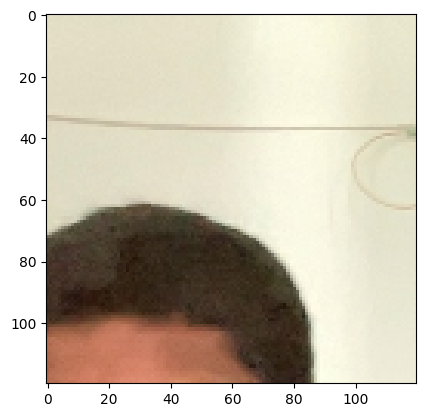

In [27]:
b=test_images.as_numpy_iterator().next()
plt.imshow(b)

# 6. Preparing the Labels

In [28]:
def load_labels(label_path):
  with open(label_path.numpy(), 'r', encoding = "utf-8") as f:
    label = json.load(f)
  return [label['class']], label['bbox']

6.1 Load labels to tensorflow Dataset

In [29]:
train_labels = tf.data.Dataset.list_files(os.path.join(parent_dir,'aug_data/train/labels/*json'), shuffle = False)
train_labels = train_labels.map(lambda x: tf.py_function(load_labels, [x], [tf.uint8, tf.float16]))

In [30]:
train_labels.as_numpy_iterator().next()

(array([1], dtype=uint8),
 array([0.0794, 0.    , 1.    , 0.3647], dtype=float16))

In [31]:
test_labels = tf.data.Dataset.list_files(os.path.join(parent_dir,'aug_data/test/labels/*json'), shuffle = False)
test_labels = test_labels.map(lambda x: tf.py_function(load_labels, [x], [tf.uint8, tf.float16]))

val_labels  = tf.data.Dataset.list_files(os.path.join(parent_dir,'aug_data/val/labels/*json'), shuffle = False)
val_labels  = val_labels.map(lambda x: tf.py_function(load_labels, [x], [tf.uint8, tf.float16]))

# 7. Combine Label and Image Samples

In [32]:
print(len(train_images))
print(len(test_images))
print(len(val_images))
print(len(train_labels))
print(len(test_labels))
print(len(val_labels))

4400
700
1200
4400
700
1200


In [33]:
train=tf.data.Dataset.zip((train_images,train_labels))
train=train.shuffle(5000)
train=train.batch(8)
train= train.prefetch(4)


test = tf.data.Dataset.zip((test_images,test_labels))
test = test.shuffle(100)
test = test.batch(8)
test = test.prefetch(4)

val = tf.data.Dataset.zip( (val_images, val_labels))
val = val.shuffle(1500)
val = val.batch(8)
val = val.prefetch(4)


7.2 Visualise

In [34]:
data_samples = train.as_numpy_iterator()

In [35]:
res = data_samples.next()

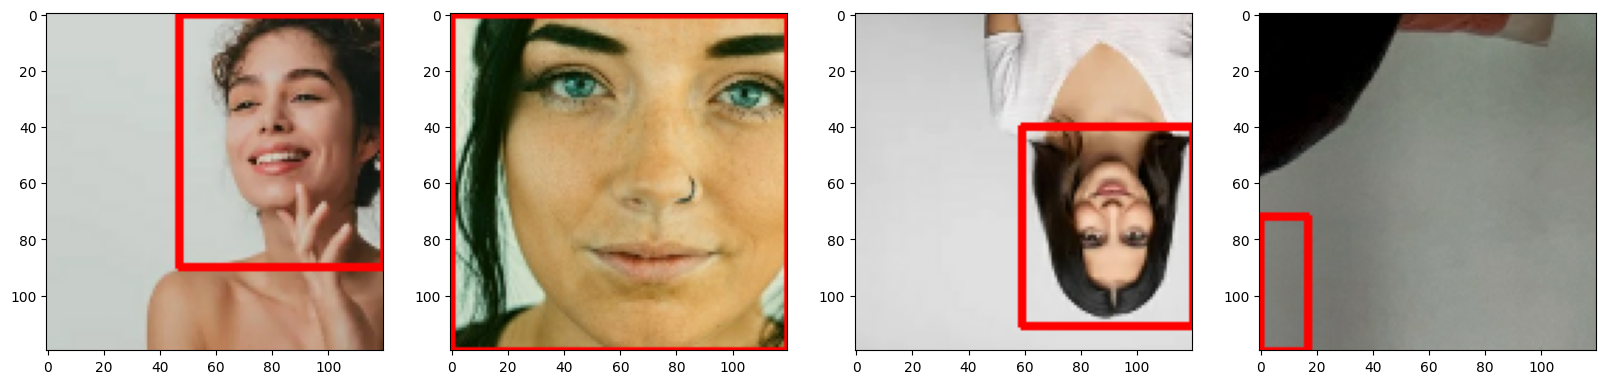

In [36]:
fig, ax = plt.subplots(ncols = 4, figsize = (20,20))
for idx in range(4):
  sample_image = res[0][idx]
  sample_coords = res[1][1][idx]

  cv2.rectangle(sample_image,
                tuple(np.multiply(sample_coords[:2],[120,120]).astype(int)),
                tuple(np.multiply(sample_coords[2:], [120,120]).astype(int)),
                (255, 0, 0), 2
                )
  ax[idx].imshow(sample_image)

#8. Build the model using Funcional API

8.1 Import Layers and Base network

In [37]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input,Conv2D, Dense, GlobalMaxPool2D
from tensorflow.keras.applications import VGG16

vgg = VGG16(include_top = False)
vgg.summary()

58889256/58889256 [==============================] - 0s 0us/step
Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, None, None, 3)]   0         
                                                                 
 block1_conv1 (Conv2D)       (None, None, None, 64)    1792      
                                                                 
 block1_conv2 (Conv2D)       (None, None, None, 64)    36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, None, None, 64)    0         
                                                                 
 block2_conv1 (Conv2D)       (None, None, None, 128)   73856     
                                                                 
 block2_conv2 (Conv2D)       (None, None, None, 128)   147584    
                                                              

8.2 Building the neural Network

In [38]:
def build_model():
  input_layer = Input(shape = (120, 120, 3))

  vgg = VGG16(include_top = False)(input_layer)
  f1 = GlobalMaxPool2D()(vgg)
  class1 = Dense(2048, activation = 'relu')(f1)
  class2 = Dense(1, activation = 'sigmoid')(class1)
  f2 = GlobalMaxPool2D()(vgg)
  regress1 = Dense(2048, activation = 'relu')(f2)
  regress2 = Dense(4, activation = 'sigmoid' )(regress1)

  facetracker = Model(inputs = input_layer, outputs = [class2,regress2])
  return facetracker

8.3 Test out the neural network

In [39]:
facetracker = build_model()

In [40]:
facetracker.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_2 (InputLayer)           [(None, 120, 120, 3  0           []                               
                                )]                                                                
                                                                                                  
 vgg16 (Functional)             (None, None, None,   14714688    ['input_2[0][0]']                
                                512)                                                              
                                                                                                  
 global_max_pooling2d (GlobalMa  (None, 512)         0           ['vgg16[0][0]']                  
 xPooling2D)                                                                                  

In [41]:
X,y = train.as_numpy_iterator().next()
X.shape

(8, 120, 120, 3)

#9. Define Losses and Optimiezers

In [42]:
batches_per_epoch = len(train)
lr_decay = (1.0/0.75 - 1)/batches_per_epoch

In [43]:
opt = tf.keras.optimizers.legacy.Adam(learning_rate = 0.0001, decay = lr_decay)

In [44]:
def localization_loss(y_true, y_pred):
  delta_coord = tf.reduce_sum(tf.square(y_true[:,:2] - y_pred[:,:2]))

  h_true = y_true[:,3] - y_true[:,1]
  w_true = y_true[:,2] - y_true[:,0]

  h_pred = y_pred[:,3] - y_pred[:,1]
  w_pred = y_pred[:,2] - y_pred[:,0]

  delta_size = tf.reduce_sum(tf.square(w_true - w_pred) + tf.square(h_true - h_pred))

  return delta_coord + delta_size

In [45]:
class_loss = tf.keras.losses.BinaryCrossentropy()
regress_loss = localization_loss

#10. Training

In [46]:
class FaceTracker(Model):
    def __init__(self, eyetracker,  **kwargs):
        super().__init__(**kwargs)
        self.model = eyetracker

    def compile(self, opt, classloss, localizationloss, **kwargs):
        super().compile(**kwargs)
        self.closs = classloss
        self.lloss = localizationloss
        self.opt = opt

    def train_step(self, batch, **kwargs):

        X, y = batch

        with tf.GradientTape() as tape:
            classes, coords = self.model(X, training=True)

            batch_classloss = self.closs(y[0], classes)
            batch_localizationloss = self.lloss(tf.cast(y[1], tf.float32), coords)

            total_loss = batch_localizationloss+0.5*batch_classloss

            grad = tape.gradient(total_loss, self.model.trainable_variables)

        opt.apply_gradients(zip(grad, self.model.trainable_variables))

        return {"total_loss":total_loss, "class_loss":batch_classloss, "regress_loss":batch_localizationloss}

    def test_step(self, batch, **kwargs):
        X, y = batch

        classes, coords = self.model(X, training=False)

        batch_classloss = self.closs(y[0], classes)
        batch_localizationloss = self.lloss(tf.cast(y[1], tf.float32), coords)
        total_loss = batch_localizationloss+0.5*batch_classloss

        return {"total_loss":total_loss, "class_loss":batch_classloss, "regress_loss":batch_localizationloss}

    def call(self, X, **kwargs):
        return self.model(X, **kwargs)

In [47]:
model= FaceTracker(facetracker)

In [48]:
model.compile(opt, classloss=class_loss, localizationloss= regress_loss)

In [49]:
logdir='logs'
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir= logdir)

In [50]:
hist = model.fit(train, epochs=40, validation_data = val, callbacks = [tensorboard_callback])

Epoch 1/40
550/550 [==============================] - 297s 488ms/step - total_loss: 0.9679 - class_loss: 0.2062 - regress_loss: 0.8648 - val_total_loss: 0.8831 - val_class_loss: 0.1806 - val_regress_loss: 0.7929
Epoch 2/40
550/550 [==============================] - 53s 67ms/step - total_loss: 0.5476 - class_loss: 0.1344 - regress_loss: 0.4804 - val_total_loss: 0.7405 - val_class_loss: 0.0822 - val_regress_loss: 0.6994
Epoch 3/40
550/550 [==============================] - 53s 68ms/step - total_loss: 0.4095 - class_loss: 0.1007 - regress_loss: 0.3591 - val_total_loss: 1.1365 - val_class_loss: 0.1805 - val_regress_loss: 1.0463
Epoch 4/40
550/550 [==============================] - 52s 67ms/step - total_loss: 0.3241 - class_loss: 0.0843 - regress_loss: 0.2819 - val_total_loss: 1.5472 - val_class_loss: 0.3244 - val_regress_loss: 1.3850
Epoch 5/40
550/550 [==============================] - 53s 67ms/step - total_loss: 0.2634 - class_loss: 0.0716 - regress_loss: 0.2276 - val_total_loss: 0.5908 

10.3 Plot Performance





In [ ]:
hist.history

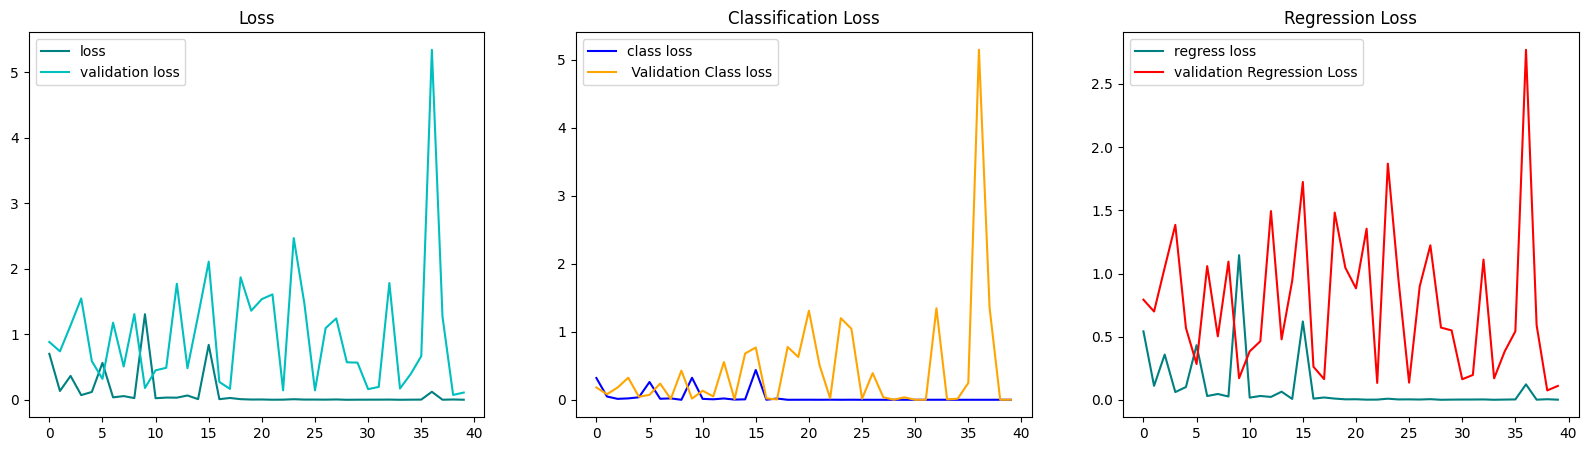

In [52]:
fig, ax = plt.subplots(ncols = 3, figsize = (20, 5))

ax[0].plot(hist.history['total_loss'], color='teal', label='loss')
ax[0].plot(hist.history['val_total_loss'], color='c', label = 'validation loss')
ax[0].title.set_text('Loss')
ax[0].legend()

ax[1].plot(hist.history['class_loss'], color= 'blue', label='class loss')
ax[1].plot(hist.history['val_class_loss'], color = 'orange', label =' Validation Class loss')
ax[1].title.set_text('Classification Loss')
ax[1].legend()

ax[2].plot(hist.history['regress_loss'], color = 'teal', label = 'regress loss')
ax[2].plot(hist.history['val_regress_loss'], color = 'red', label = 'validation Regression Loss')
ax[2].title.set_text("Regression Loss")
ax[2].legend()

plt.show()

#11. Make Predictions


In [90]:
test_data = test.as_numpy_iterator()

In [91]:
test_sample = test_data.next()

In [92]:
X_test, y_test = test_data.next()

In [93]:
y_pred = facetracker.predict(test_sample[0])

1/1 [==============================] - 0s 22ms/step


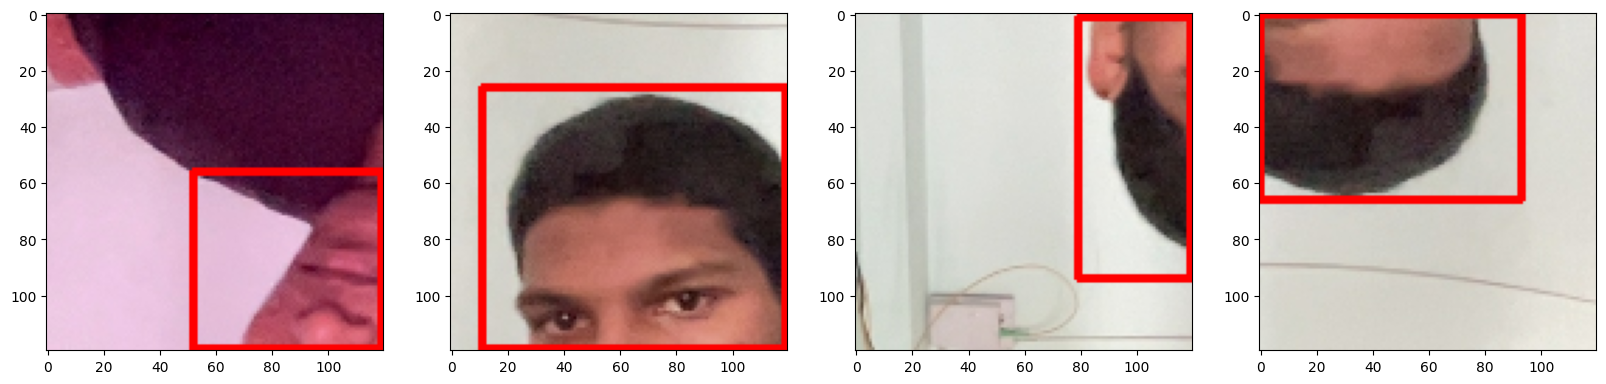

In [94]:
fig, ax = plt.subplots(ncols = 4 , figsize = (20, 20))
for idx in range(4):
  sample_image = test_sample[0][idx]
  sample_coords = y_pred[1][idx]

  if y_pred[0][idx] > 0.5:
    cv2.rectangle(sample_image,
                  tuple(np.multiply(sample_coords[:2], [120, 120]).astype(int)),
                  tuple(np.multiply(sample_coords[2:], [120, 120]).astype(int)),
                  (255, 0, 0), 2
                  )
    ax[idx].imshow(sample_image)

11.2 Save the model

In [58]:
from tensorflow.keras.models import load_model
facetracker.save('facetracker.h5')

11.3 Real Time Detection

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import load_model
import cv2
import numpy as np


facetracker = load_model('facetracker.h5')

cap = cv2.VideoCapture(0)
while cap.isOpened():
  _, frame = cap.read()
  frame = frame[50:500, 50:500, :]

  rgb = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
  resized = tf.image.resize(rgb, (120, 120))

  y_hat=facetracker.predict(np.expand_dims(resized/255.0,axis = 0))
  sample_coords = y_hat[1][0]

  if y_hat[0] > 0.5:
    cv2.rectangle(frame,
                  tuple(np.multiply(sample_coords[:2], [450, 450]).astype(int)),
                  tuple(np.multiply(sample_coords[2:], [450, 450]).astype(int)),
                  (255, 0, 0), 2
                  )


    cv2.rectangle(frame, 
                    tuple(np.add(np.multiply(sample_coords[:2], [450,450]).astype(int), 
                                  [0,-30])),
                    tuple(np.add(np.multiply(sample_coords[:2], [450,450]).astype(int),
                                  [80,0])), 
                          (255,0,0), -1)

    cv2.imshow('EyeTrack', frame)

    if cv2.waitKey(1) & 0xFF == ord('q'):#press q key to terminate
        break
cap.release()
cv2.destroyAllWindows()
